In [117]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

### Dataset

In [320]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [194]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


In [38]:
# drop default index
df = pd.read_csv("Iris.csv", index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [321]:
# Drop Id column
df.drop("Id", inplace = True, axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], [0, 1, 2], inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [315]:
df.iloc[:, [0, 1, 2, 3]].values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [322]:
# Extract the values for features and create a list called featuresAll
features = df.iloc[:, [0, 1, 2, 3]].values
features.shape

(150, 4)

In [323]:
targets = df["Species"]
targets.shape

(150,)

In [326]:
featuresAll = []
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])
print(featuresAll)

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2], [11.4], [9.700000000000001], [10.1], [8.9], [9.6], [10.8], [9.999999999999998], [9.299999999999999], [8.5], [11.2], [12.000000000000002], [11.000000000000002], [10.3], [11.5], [10.7], [10.7], [10.700000000000001], [9.399999999999999], [10.599999999999998], [10.299999999999999], [9.799999999999999], [10.4], [10.399999999999999], [10.2], [9.7], [9.7], [10.700000000000001], [10.9], [11.299999999999999], [9.6], [9.599999999999998], [10.5], [9.6], [8.9], [10.2], [10.100000000000001], [8.4], [9.1], [10.7], [11.2], [9.5], [10.699999999999998], [9.399999999999999], [10.7], [9.9], [16.299999999999997], [15.600000000000001], [16.4], [13.100000000000001], [15.4], [14.3], [15.9], [11.600000000000001], [15.4], [13.200000000000001], [11.5], [14.600000000000001], [13.2], [15.1], [13.4], [15.600000000000001], [14.6], [13.6], [14.4], [13.1], [15.700000000000003], [14.2], [15.200000000000001], [14.799999999999997], [14.900000000000002], [15.4], [15.799

### Plotting the Scatter plot

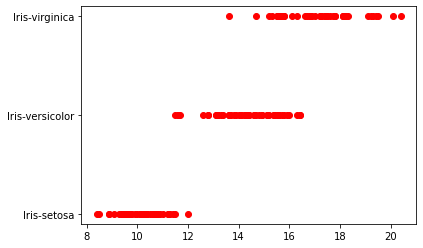

In [327]:
plt.scatter(featuresAll, targets, color = "red", alpha = 1.0)

### Scatter Plot with Iris Dataset (Relationship between Sepal Length and Sepal Width)

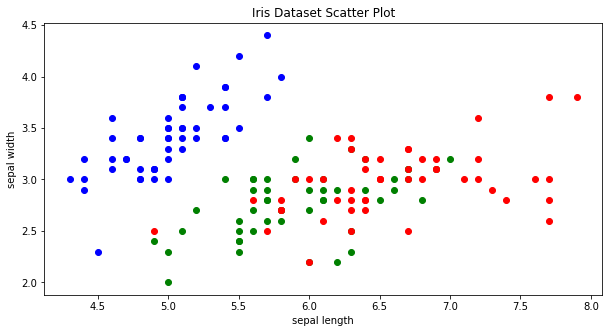

In [328]:
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[0]) # Sepal length
    targets.append(feature[1]) # Sepal width
    
groups = ("Iris-setosa", "Iris-versicolor", "Iris-virginica")
colors = ("blue", "green", "red")
data = ((featuresAll[:50], targets[:50]), (featuresAll[50:100], targets[50:100]), (featuresAll[100:150], targets[100:150]))
""
plt.figure(figsize = (10, 5))
for item, color, group in zip(data, colors, groups):
    x, y = item
    plt.scatter(x, y, color = color, alpha = 1)
    plt.title("Iris Dataset Scatter Plot")
    
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()


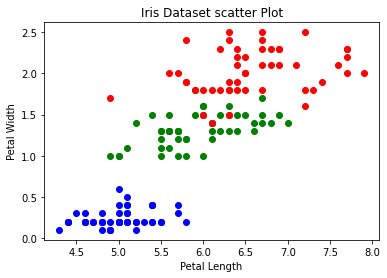

In [329]:
festuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[2]) # Petal Length
    targets.append(feature[3]) # Petal Width
    
groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')
colors = ("blue", "green", "red")
data = ((featuresAll[:50], targets[:50]), (featuresAll[50:100], targets[50:100]), (featuresAll[100:150], targets[100:150]))

for item, color, group in zip(data, colors, groups):
    x0, y0 = item
    plt.scatter(x0, y0, color = color, alpha = 1)
    plt.title('Iris Dataset scatter Plot')
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


### KNeighborsClassifier Algorithm

In [330]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn

KNeighborsClassifier(n_neighbors=1)

In [331]:
# Sepal length and sepal width
sepal_length = []
sepal_width = []
for feature in features:
    sepal_length.append(feature[0]) # Sepal Length
    sepal_width.append(feature[1]) # sepal width

### Predict Class by Sepal Length

In [332]:
# Features Shape
X1 = np.asarray(sepal_length)
X = X1.reshape(-1, 1)
X.shape

(150, 1)

In [333]:
# Target Class
y= df["Species"]
y.shape

(150,)

In [337]:
# Fit Model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [338]:
# This will help us to predict Iris Class by inserting Sepal Length
np.unique(X)

array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9])

In [339]:
# Sepal Length
print(knn.predict(np.column_stack([[6, 3, 7.5]])))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


### Predict Class by Sepal Width

In [340]:
# Sepal Width
X2 = np.asarray(sepal_width)
X = X2.reshape(-1, 1)
X.shape

(150, 1)

In [341]:
#Fit
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [342]:
# This will help us to predict Iris Class by inserting Sepal Width
np.unique(X2)

array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4])

In [343]:
# Sepal Width Class
print(knn.predict(np.column_stack([[2.9, 2.5, 3.0]])))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


### Predict Class by Petal Length

In [344]:
petal_length = []
petal_width = []
for feature in features:
    petal_length.append(feature[2])
    petal_width.append(feature[3])

In [345]:
X2 = np.asarray(petal_length)
X = X2.reshape(-1, 1)
X.shape

(150, 1)

In [346]:
# Fit
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [347]:
# This will help to insert values to predict class
np.unique(X)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9])

In [348]:
# Petal Length Class
print(knn.predict(np.column_stack([[1.6, 6.1, 3.4]])))

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


### Predict Class by Petal Width

In [349]:
X3 = np.asarray(petal_width)
X = X3.reshape(-1, 1)
X.shape

(150, 1)

In [350]:
# Fit
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [351]:
# This will help to insert values to predict class
np.unique(X)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

In [352]:
print(knn.predict(np.column_stack([[0.5, 1.6, 2.1]])))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


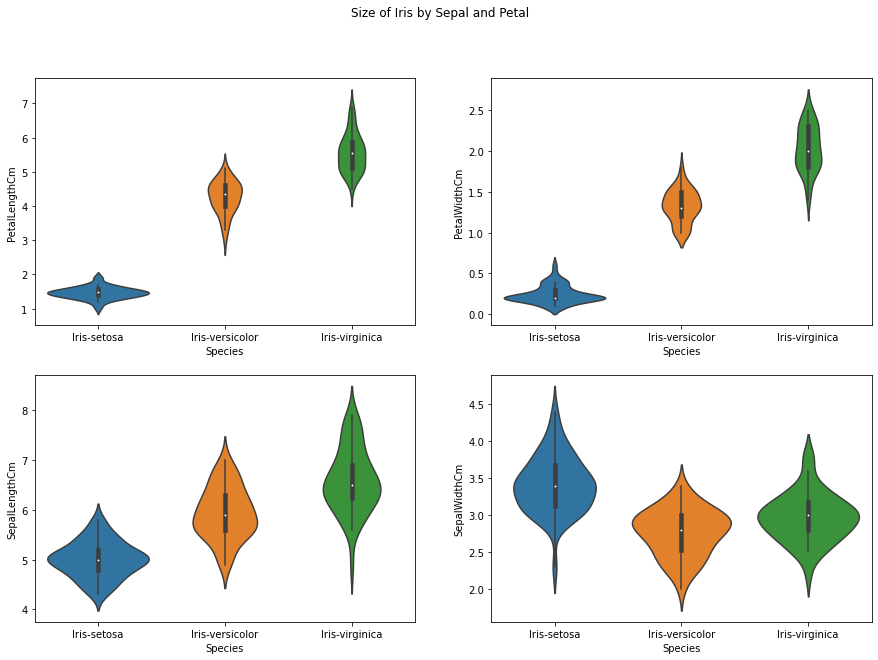

In [353]:
plt.figure(figsize = (15, 10))
plt.suptitle("Size of Iris by Sepal and Petal")
plt.subplot(2, 2, 1)
sns.violinplot(x = "Species", y = "PetalLengthCm", data = df)

plt.subplot(2, 2, 2)
sns.violinplot(x = "Species", y = "PetalWidthCm", data = df)

plt.subplot(2, 2, 3)
sns.violinplot(x = "Species", y = "SepalLengthCm", data = df)

plt.subplot(2, 2, 4)
sns.violinplot(x = "Species", y = "SepalWidthCm", data = df)

plt.show()

### Supervised Learning: Iris Classification

In [355]:
X = df.iloc[:, 0:4]
Y = df["Species"]

In [356]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

In [423]:
# Train and Test Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X, Y)

y_model = model.predict(X_test)

pd.DataFrame(y_model).head()

,0
0,Iris-virginica
1,Iris-versicolor
2,Iris-setosa
3,Iris-virginica
4,Iris-setosa


In [358]:
# Accuracy Score
accuracy_score(Y_test, y_model)

0.95

### Supervised Learning: K-Means Clustering

**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

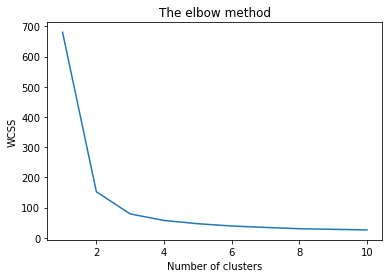

In [377]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [378]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [374]:
# K-Means Clustering Object
km = KMeans(n_clusters = 3, max_iter = 1000)

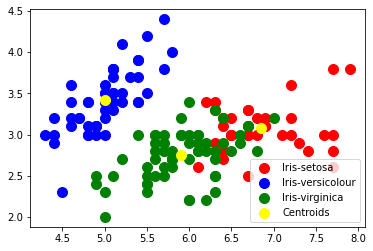

In [379]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**K Means Clustering in SciKit Learn with Iris Data**

In [389]:
km = KMeans(n_clusters = 3, max_iter = 1000)

In [390]:
# features
featuresAll = []
features = df.iloc[:, [0,1,2,3]].values
for observation in features:
    featuresAll.append([observation[0], observation[1], observation[2], observation[3]])

In [391]:
# Sepal Length and Sepal Width
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[0]) #Sepal length
    targets.append(feature[1]) #sepal width

In [392]:
# Petal Length and Petal Width
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[2]) #Petal length
    targets.append(feature[3]) #Petal width

In [393]:
# Sepal Length
X1 = np.asarray(featuresAll)
X1 = X1.reshape(-1, 1)
X1.shape

(150, 1)

In [394]:
# Fit features
km.fit(features)

KMeans(max_iter=1000, n_clusters=3)

In [395]:
# Centers of clusters
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [396]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

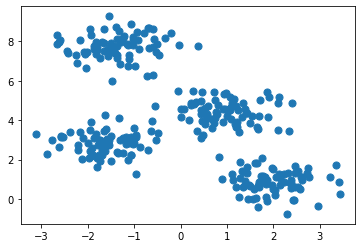

In [397]:
X1, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X1[:, 0], X1[:, 1], s=50);

In [398]:
# Prediction
km = KMeans(n_clusters = 4)
km.fit(X1)
y_kmeans = km.predict(X1)
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3])

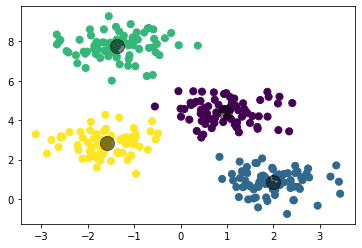

In [399]:
plt.scatter(X1[:, 0], X1[:, 1], c = y_kmeans, s = 50, cmap = "viridis")
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5);

### Unsupervised Learning: Iris Dimensionality

In [400]:
model = PCA(n_components = 2)

In [415]:
X = df.iloc[:, 0:4]

In [416]:
model.fit(X)

PCA(n_components=2)

In [417]:
X_2D = model.transform(X)
X_2D

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [418]:
X_2D[:, 0]

array([-2.68420713, -2.71539062, -2.88981954, -2.7464372 , -2.72859298,
       -2.27989736, -2.82089068, -2.62648199, -2.88795857, -2.67384469,
       -2.50652679, -2.61314272, -2.78743398, -3.22520045, -2.64354322,
       -2.38386932, -2.6225262 , -2.64832273, -2.19907796, -2.58734619,
       -2.3105317 , -2.54323491, -3.21585769, -2.30312854, -2.35617109,
       -2.50791723, -2.469056  , -2.56239095, -2.63982127, -2.63284791,
       -2.58846205, -2.41007734, -2.64763667, -2.59715948, -2.67384469,
       -2.86699985, -2.62522846, -2.67384469, -2.98184266, -2.59032303,
       -2.77013891, -2.85221108, -2.99829644, -2.4055141 , -2.20883295,
       -2.71566519, -2.53757337, -2.8403213 , -2.54268576, -2.70391231,
        1.28479459,  0.93241075,  1.46406132,  0.18096721,  1.08713449,
        0.64043675,  1.09522371, -0.75146714,  1.04329778, -0.01019007,
       -0.5110862 ,  0.51109806,  0.26233576,  0.98404455, -0.174864  ,
        0.92757294,  0.65959279,  0.23454059,  0.94236171,  0.04

In [419]:
# Second Dimension
X_2D[:, 1]

array([ 0.32660731, -0.16955685, -0.13734561, -0.31112432,  0.33392456,
        0.74778271, -0.08210451,  0.17040535, -0.57079803, -0.1066917 ,
        0.65193501,  0.02152063, -0.22774019, -0.50327991,  1.1861949 ,
        1.34475434,  0.81808967,  0.31913667,  0.87924409,  0.52047364,
        0.39786782,  0.44003175,  0.14161557,  0.10552268, -0.03120959,
       -0.13905634,  0.13788731,  0.37468456,  0.31929007, -0.19007583,
       -0.19739308,  0.41808001,  0.81998263,  1.10002193, -0.1066917 ,
        0.0771931 ,  0.60680001, -0.1066917 , -0.48025005,  0.23605934,
        0.27105942, -0.93286537, -0.33430757,  0.19591726,  0.44269603,
       -0.24268148,  0.51036755, -0.22057634,  0.58628103,  0.11501085,
        0.68543919,  0.31919809,  0.50418983, -0.82560394,  0.07539039,
       -0.41732348,  0.28389121, -1.00110751,  0.22895691, -0.72057487,
       -1.26249195, -0.10228411, -0.5478933 , -0.12436042, -0.25181557,
        0.46823621, -0.35197629, -0.33192183, -0.54182226, -0.58

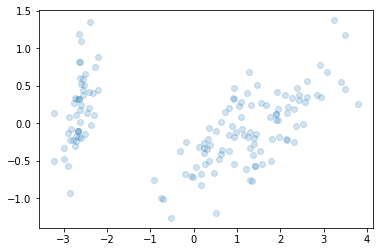

In [420]:
plt.scatter(X_2D[:, 0], X_2D[:, 1], alpha=0.2)

### Pivot the Data with Iris Dataset

In [297]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**The simplest pivot table must have a dataframe and an index . In this case, let’s use the Species as our index.**

In [298]:
pd.pivot_table(df, index = ["Id"]).head(5)

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Id,,,,
1,1.4,0.2,5.1,3.5
2,1.4,0.2,4.9,3.0
3,1.3,0.2,4.7,3.2
4,1.5,0.2,4.6,3.1
5,1.4,0.2,5.0,3.6


**You can have multiple indexes as well. In fact, most of the pivot_table args can take multiple values via a list**

In [299]:
pd.pivot_table(df, index = ["Id", "Species"]).head(5)

,,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Id,Species,,,,
1,Iris-setosa,1.4,0.2,5.1,3.5
2,Iris-setosa,1.4,0.2,4.9,3.0
3,Iris-setosa,1.3,0.2,4.7,3.2
4,Iris-setosa,1.5,0.2,4.6,3.1
5,Iris-setosa,1.4,0.2,5.0,3.6


**This is interesting but not particularly useful. What we probably want to do is look at this by Species and ID. It’s easy enough to do by changing the index**

In [302]:
pd.pivot_table(df, index = ["Species", "Id"]).head()

PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
Species     Id                                                          
Iris-setosa 1             1.4           0.2            5.1           3.5
            2             1.4           0.2            4.9           3.0
            3             1.3           0.2            4.7           3.2
            4             1.5           0.2            4.6           3.1
            5             1.4           0.2            5.0           3.6

**You can see that the pivot table is smart enough to start aggregating the data and summarizing Sepal Lenth and Petal length with their Species name.**

In [303]:
pd.pivot_table(df, index = ["Species"], values = ["SepalLengthCm", "SepalWidthCm"])

,SepalLengthCm,SepalWidthCm
Species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974
